In [1]:
import pandas as pd
import numpy as np

In [2]:
from utils_data import *
from utils_preproc import *

### test directly

In [3]:
ccle_expr = pd.read_csv('data/CCLE/CCLE_expression.csv', index_col=0, header=0)
ccle_expr

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537,0.028569,1.226509,3.042644,6.499686,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604071,3.264536,4.972693,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.109361,0.000000,7.031219,1.541019,3.664483,0.014355,3.624101,6.805292,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013127,1.887525,3.252476,0.028569,3.286881,6.902074,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057017,0.000000,7.814935,2.538538,3.893362,0.028569,4.078951,6.971429,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [4]:
ccle_expr.columns = [c.split(' (')[0] for c in ccle_expr.columns]
ccle_expr

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537,0.028569,1.226509,3.042644,6.499686,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604071,3.264536,4.972693,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.109361,0.000000,7.031219,1.541019,3.664483,0.014355,3.624101,6.805292,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013127,1.887525,3.252476,0.028569,3.286881,6.902074,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057017,0.000000,7.814935,2.538538,3.893362,0.028569,4.078951,6.971429,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [5]:
# remove genes that are expressed as 0 in over 90% samples
ccle_expr = ccle_expr.loc[:, (ccle_expr==0).sum()<ccle_expr.shape[0]*0.1]
ccle_expr

,TSPAN6,DPM1,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,NOTCH2NLB,ASDURF,AL441992.2,DERPC,AC055839.2,NOTCH2NLC,AP001453.3,H3C2,AC098582.1,DUS4L-BCAP29
ACH-001113,4.331992,7.364397,2.792855,4.470537,1.226509,3.042644,6.499686,4.739848,3.451541,4.181103,...,1.189034,2.981853,0.505891,4.606442,2.253989,2.435629,2.176323,2.689299,0.201634,2.130931
ACH-001289,4.566815,7.106537,2.543496,3.504620,0.189034,3.813525,4.221104,3.481557,1.903038,3.257011,...,3.720278,3.070389,0.731183,4.322649,5.826803,5.358959,2.829850,1.286881,0.321928,1.464668
ACH-001339,3.150560,7.379032,2.333424,4.227279,1.310340,6.687061,3.682573,3.273516,2.881665,3.494416,...,2.724650,1.521051,0.400538,3.855990,0.594549,3.632268,1.744161,0.594549,0.831877,2.946731
ACH-001538,5.085340,7.154109,2.545968,3.084064,5.868143,6.165309,4.489928,3.956986,2.467279,4.418190,...,0.000000,0.650765,0.356144,3.443607,0.042644,1.049631,3.829850,0.214125,0.298658,1.641546
ACH-000242,6.729145,6.537607,2.456806,3.867896,7.208381,5.569856,7.127014,4.568032,1.933573,2.620586,...,2.715893,0.863938,0.400538,2.752749,0.695994,1.678072,2.737687,1.117695,0.084064,1.910733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,6.604071,3.264536,4.972693,0.097611,0.704872,4.829850,5.178715,2.531069,3.324811,...,3.046142,0.411426,0.432959,4.381975,1.448901,2.596935,2.669027,2.229588,1.310340,3.039138
ACH-002669,3.109361,7.031219,1.541019,3.664483,3.624101,6.805292,4.472488,4.397118,2.761285,3.665620,...,2.498251,2.839960,0.495695,3.848998,0.124328,4.681449,1.321928,0.189034,0.356144,1.327687
ACH-001858,4.390943,7.013127,1.887525,3.252476,3.286881,6.902074,5.410748,3.401903,3.264536,4.047015,...,4.823749,1.604071,0.565597,3.206331,2.604071,4.243364,3.602884,1.097611,0.613532,1.992768
ACH-001997,5.057017,7.814935,2.538538,3.893362,4.078951,6.971429,4.469886,3.463361,2.682573,4.933100,...,2.653060,2.169925,0.495695,4.241077,0.097611,2.459432,3.795975,0.831877,1.292782,2.153805


In [6]:
expr_var = ccle_expr.var()
expr_var

TSPAN6          2.707771
DPM1            0.418003
SCYL3           0.296790
C1orf112        0.616095
CFH             5.026237
                  ...   
NOTCH2NLC       1.214480
AP001453.3      0.418251
H3C2            0.528219
AC098582.1      0.130434
DUS4L-BCAP29    0.467894
Length: 13142, dtype: float64

In [7]:
expr_var_arr = np.array(expr_var)
expr_var_arr

array([2.70777134, 0.4180028 , 0.2967895 , ..., 0.5282194 , 0.13043429,
       0.46789387])

In [8]:
gene_rnk = np.flip(np.argsort(expr_var_arr))
gene_rnk

array([ 9632,  3304,  9085, ...,  8538, 12593, 13128])

In [9]:
ranked_expr_var = expr_var[gene_rnk]
ranked_expr_var

KRT19         17.199732
SPARC         16.486361
C19orf33      15.189725
VIM           14.629684
UCHL1         14.453316
                ...    
SPDYE3         0.012106
PRH2           0.011445
CAGE1          0.010418
PPP1R2B        0.009440
AC090517.4     0.009419
Length: 13142, dtype: float64

In [11]:
selected_expr_var = ranked_expr_var[:None]
selected_expr_var

KRT19         17.199732
SPARC         16.486361
C19orf33      15.189725
VIM           14.629684
UCHL1         14.453316
                ...    
SPDYE3         0.012106
PRH2           0.011445
CAGE1          0.010418
PPP1R2B        0.009440
AC090517.4     0.009419
Length: 13142, dtype: float64

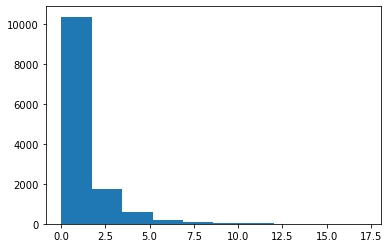

In [10]:
import matplotlib.pyplot as plt
plt.hist(ranked_expr_var)
plt.show()

In [11]:
filtered_expr = ccle_expr.iloc[:, gene_rnk[:1000]]
filtered_expr

,KRT19 (3880),SPARC (6678),C19orf33 (64073),VIM (7431),UCHL1 (7345),TGFBI (7045),KRT7 (3855),FN1 (2335),KRT8 (3856),FXYD3 (5349),...,CSPG4 (1464),ST6GALNAC2 (10610),DNAJC12 (56521),DUSP1 (1843),SH3BP4 (23677),ARHGAP23 (57636),MYO10 (4651),LAMA1 (284217),CENPV (201161),CD276 (80381)
ACH-001113,8.013016,3.982765,2.289834,8.356100,9.554742,0.454176,1.077243,8.813204,7.429449,8.924842,...,0.176323,2.395063,0.765535,6.033643,5.044394,2.927896,4.699330,4.583760,4.292045,5.053546
ACH-001289,0.443607,6.943570,0.443607,9.940328,9.959553,0.378512,0.000000,3.160275,0.604071,0.739848,...,2.056584,0.014355,1.718088,4.033863,1.963474,0.941106,7.065874,0.565597,5.296090,4.440288
ACH-001339,0.584963,11.784635,0.226509,11.162706,3.396434,10.663647,1.744161,10.632904,4.676380,7.345183,...,5.758623,5.297925,0.748461,2.173127,4.239551,3.615887,4.791293,4.311067,1.641546,6.386121
ACH-001538,11.375528,0.214125,8.949477,4.258519,0.799087,6.961623,11.189392,0.731183,9.643351,11.302410,...,0.214125,6.501758,2.580145,3.788686,4.144862,5.523876,2.942984,0.464668,3.507160,4.962086
ACH-000242,10.970609,0.739848,8.044886,1.748461,1.384050,3.190615,11.812258,3.427606,10.431393,9.470191,...,0.189034,4.309613,0.250962,4.879706,2.956057,7.141290,4.156235,0.163499,5.832637,5.833143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,1.384050,1.903038,0.739848,7.610360,0.773996,2.080658,1.257011,3.030336,2.046142,0.189034,...,0.263034,0.238787,3.168321,2.944858,0.111031,3.650765,0.356144,0.070389,5.322649,0.344828
ACH-002669,7.348640,0.000000,9.147129,3.250962,0.000000,5.524503,5.418527,5.694602,9.238644,7.422149,...,0.411426,1.007196,4.978653,3.130931,4.241840,3.017922,5.491532,0.042644,3.995485,4.935931
ACH-001858,8.868360,8.472691,8.574480,11.438012,10.164278,10.479578,9.989536,11.032115,10.408754,2.648465,...,2.003602,1.056584,0.097611,4.753284,5.435295,4.908333,4.083213,0.000000,4.634593,5.826040
ACH-001997,11.628354,0.056584,9.863969,2.084064,0.000000,9.161182,6.001127,6.927067,12.345405,9.947520,...,0.356144,2.693766,0.084064,3.235727,4.766595,6.438459,2.438293,0.014355,3.534809,4.076388


In [12]:
meta_data = pd.read_csv('data/CCLE/sample_info.csv', header=0, usecols=['DepMap_ID', 'COSMICID'])
meta_data

,DepMap_ID,COSMICID
0,ACH-000016,NaN
1,ACH-000032,NaN
2,ACH-000033,NaN
3,ACH-000043,NaN
4,ACH-000049,NaN
...,...,...
1835,ACH-002393,NaN
1836,ACH-002394,NaN
1837,ACH-002395,NaN
1838,ACH-002396,NaN


In [13]:
meta_data = meta_data[meta_data['COSMICID'].notna()]
meta_data

,DepMap_ID,COSMICID
44,ACH-000288,905951.0
62,ACH-000467,1290907.0
325,ACH-002287,908482.0
400,ACH-000001,905933.0
401,ACH-000002,905938.0
...,...,...
1800,ACH-002313,1331045.0
1801,ACH-002314,909773.0
1802,ACH-002316,1331049.0
1803,ACH-002317,946358.0


In [14]:
expr_data = filtered_expr.merge(meta_data, left_index=True, right_on='DepMap_ID')
expr_data

,KRT19 (3880),SPARC (6678),C19orf33 (64073),VIM (7431),UCHL1 (7345),TGFBI (7045),KRT7 (3855),FN1 (2335),KRT8 (3856),FXYD3 (5349),...,DNAJC12 (56521),DUSP1 (1843),SH3BP4 (23677),ARHGAP23 (57636),MYO10 (4651),LAMA1 (284217),CENPV (201161),CD276 (80381),DepMap_ID,COSMICID
599,10.970609,0.739848,8.044886,1.748461,1.384050,3.190615,11.812258,3.427606,10.431393,9.470191,...,0.250962,4.879706,2.956057,7.141290,4.156235,0.163499,5.832637,5.833143,ACH-000242,687455.0
1022,9.360715,2.632268,7.482203,3.140779,1.150560,5.874059,2.060047,3.307429,11.374116,8.630267,...,0.310340,3.941106,4.994580,0.310340,5.353676,0.286881,0.163499,4.053111,ACH-000708,1659929.0
675,4.431623,0.823749,6.802839,1.475085,5.741197,6.598574,9.222867,4.015248,9.051019,7.455163,...,4.387500,7.292782,3.544733,0.111031,4.297191,2.163499,1.978196,5.245267,ACH-000327,684681.0
592,2.000000,1.124328,0.956057,9.580485,1.304511,2.049631,1.432959,2.879706,3.798051,0.704872,...,0.925999,5.895060,2.150560,3.319040,4.231125,2.000000,4.896272,4.999549,ACH-000233,906836.0
856,10.287712,1.327687,9.001239,1.464668,0.411426,1.084064,4.766595,8.755455,11.672779,3.636915,...,0.084064,7.565369,3.596935,7.449974,2.904966,0.823749,1.049631,5.757557,ACH-000528,906791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,9.385560,2.090853,8.680887,4.865919,4.989139,8.011898,10.982352,8.619340,10.996403,7.676803,...,0.669027,4.617063,5.486071,4.470537,3.493135,1.682573,5.124328,5.427606,ACH-000114,1240218.0
1512,1.427606,5.685099,0.000000,9.353566,7.783522,2.292782,0.176323,5.436961,5.659354,0.014355,...,2.851999,2.247928,6.067811,1.794936,6.494576,3.785551,4.105175,4.780310,ACH-001578,908441.0
1265,3.737687,1.042644,5.580447,9.206355,9.000056,2.350497,9.889413,6.465322,10.390491,0.782409,...,0.871844,6.888743,3.392317,3.779260,0.594549,0.594549,7.122466,4.627023,ACH-000973,906798.0
1057,1.007196,7.974529,0.422233,11.202675,0.333424,6.248876,1.521051,7.721373,6.010108,0.495695,...,0.124328,6.549823,3.826803,4.840463,5.109778,1.157044,3.570463,3.594549,ACH-000750,905974.0


In [15]:
expr_data.drop('DepMap_ID', axis=1, inplace=True)

expr_data['COSMICID'] = expr_data['COSMICID'].astype('int')
expr_data.set_index('COSMICID', inplace=True)
expr_data

,KRT19 (3880),SPARC (6678),C19orf33 (64073),VIM (7431),UCHL1 (7345),TGFBI (7045),KRT7 (3855),FN1 (2335),KRT8 (3856),FXYD3 (5349),...,CSPG4 (1464),ST6GALNAC2 (10610),DNAJC12 (56521),DUSP1 (1843),SH3BP4 (23677),ARHGAP23 (57636),MYO10 (4651),LAMA1 (284217),CENPV (201161),CD276 (80381)
COSMICID,,,,,,,,,,,,,,,,,,,,,
687455,10.970609,0.739848,8.044886,1.748461,1.384050,3.190615,11.812258,3.427606,10.431393,9.470191,...,0.189034,4.309613,0.250962,4.879706,2.956057,7.141290,4.156235,0.163499,5.832637,5.833143
1659929,9.360715,2.632268,7.482203,3.140779,1.150560,5.874059,2.060047,3.307429,11.374116,8.630267,...,0.137504,1.748461,0.310340,3.941106,4.994580,0.310340,5.353676,0.286881,0.163499,4.053111
684681,4.431623,0.823749,6.802839,1.475085,5.741197,6.598574,9.222867,4.015248,9.051019,7.455163,...,0.070389,1.632268,4.387500,7.292782,3.544733,0.111031,4.297191,2.163499,1.978196,5.245267
906836,2.000000,1.124328,0.956057,9.580485,1.304511,2.049631,1.432959,2.879706,3.798051,0.704872,...,0.263034,0.111031,0.925999,5.895060,2.150560,3.319040,4.231125,2.000000,4.896272,4.999549
906791,10.287712,1.327687,9.001239,1.464668,0.411426,1.084064,4.766595,8.755455,11.672779,3.636915,...,0.070389,4.799605,0.084064,7.565369,3.596935,7.449974,2.904966,0.823749,1.049631,5.757557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240218,9.385560,2.090853,8.680887,4.865919,4.989139,8.011898,10.982352,8.619340,10.996403,7.676803,...,0.565597,2.094236,0.669027,4.617063,5.486071,4.470537,3.493135,1.682573,5.124328,5.427606
908441,1.427606,5.685099,0.000000,9.353566,7.783522,2.292782,0.176323,5.436961,5.659354,0.014355,...,0.056584,0.475085,2.851999,2.247928,6.067811,1.794936,6.494576,3.785551,4.105175,4.780310
906798,3.737687,1.042644,5.580447,9.206355,9.000056,2.350497,9.889413,6.465322,10.390491,0.782409,...,2.042644,0.432959,0.871844,6.888743,3.392317,3.779260,0.594549,0.594549,7.122466,4.627023


In [16]:
expr_data.columns

Index(['KRT19 (3880)', 'SPARC (6678)', 'C19orf33 (64073)', 'VIM (7431)',
       'UCHL1 (7345)', 'TGFBI (7045)', 'KRT7 (3855)', 'FN1 (2335)',
       'KRT8 (3856)', 'FXYD3 (5349)',
       ...
       'CSPG4 (1464)', 'ST6GALNAC2 (10610)', 'DNAJC12 (56521)', 'DUSP1 (1843)',
       'SH3BP4 (23677)', 'ARHGAP23 (57636)', 'MYO10 (4651)', 'LAMA1 (284217)',
       'CENPV (201161)', 'CD276 (80381)'],
      dtype='object', length=1000)

In [61]:
expr_data.values

array([[10.97060924,  0.7398481 ,  8.04488586, ...,  0.16349873,
         5.83263689,  5.8331431 ],
       [ 9.36071543,  2.63226822,  7.48220293, ...,  0.28688115,
         0.16349873,  4.05311134],
       [ 4.43162296,  0.82374936,  6.80283944, ...,  2.16349873,
         1.97819563,  5.24526747],
       ...,
       [ 3.73768676,  1.04264434,  5.58044702, ...,  0.59454855,
         7.12246566,  4.62702311],
       [ 1.0071955 ,  7.97452931,  0.422233  , ...,  1.15704371,
         3.57046293,  3.59454855],
       [ 2.63226822,  7.78044134,  0.5849625 , ...,  0.02856915,
         6.05332859,  5.66135057]])

In [58]:
cells = expr_data.index.values
cells

array([ 687455, 1659929,  684681,  906836,  906791, 1240215,  910698,
        687592,  908138,  687787,  909907,  909755,  910921,  688023,
        753573,  924250,  908148,  907322,  909723,  906821,  910549,
       1503371, 1290798, 1659823, 1290806, 1298226,  908132,  909700,
        924244,  909778, 1240220, 1240122,  753556,  753586,  910548,
        749717,  687590,  949093, 1240147,  687777,  910933,  910927,
        905985,  688010,  906790,  687800,  907067,  905939,  910702,
        724828,  907792,  908460, 1240124, 1240183,  749714,  924248,
        946361, 1240127,  909904, 1298145,  910554,  909713,  909696,
        906868,  906824,  905936,  907287,  905946,  906851, 1240160,
        687815,  907051,  905965,  753605,  906818,  907055,  910916,
        905981,  907063,  753569, 1298359, 1290906,  909749,  753592,
        687985,  910925,  688027, 1503365,  907286, 1660036,  906830,
       1298168,  910920, 1290922, 1297449,  906797,  909715, 1298356,
        724878,  906

In [60]:
cell_dict = dict()
for c in cells:
    idx = np.where(cells==c)[0]
    cell_dict[c] = idx
    
cell_dict

{687455: array([0]),
 1659929: array([1]),
 684681: array([2]),
 906836: array([3]),
 906791: array([4]),
 1240215: array([5]),
 910698: array([6]),
 687592: array([7]),
 908138: array([8]),
 687787: array([9]),
 909907: array([10]),
 909755: array([11]),
 910921: array([12]),
 688023: array([13]),
 753573: array([14]),
 924250: array([15]),
 908148: array([16]),
 907322: array([17]),
 909723: array([18]),
 906821: array([19]),
 910549: array([20]),
 1503371: array([21]),
 1290798: array([22]),
 1659823: array([23]),
 1290806: array([24]),
 1298226: array([25]),
 908132: array([26]),
 909700: array([27]),
 924244: array([28]),
 909778: array([29]),
 1240220: array([30]),
 1240122: array([31]),
 753556: array([32]),
 753586: array([33]),
 910548: array([34]),
 749717: array([35]),
 687590: array([36]),
 949093: array([37]),
 1240147: array([38]),
 687777: array([39]),
 910933: array([40]),
 910927: array([41]),
 905985: array([42]),
 688010: array([43]),
 906790: array([44]),
 687800: a

### compile into functions

In [3]:
def preproc_gene_expr(ccle_expr, meta_data):
    # remove genes with low expression levels and select top 1000 genes according to variance
    ccle_expr = ccle_expr.loc[:, (ccle_expr==0).sum()<ccle_expr.shape[0]*0.1]
    expr_var = ccle_expr.var()
    expr_var_arr = np.array(expr_var)
    gene_rnk = np.flip(np.argsort(expr_var_arr))
    filtered_expr = ccle_expr.iloc[:, gene_rnk[:1000]]
    
    meta_data = meta_data[meta_data['COSMICID'].notna()]
    expr_data = filtered_expr.merge(meta_data, left_index=True, right_on='DepMap_ID')
    expr_data.drop('DepMap_ID', axis=1, inplace=True)

    expr_data['COSMICID'] = expr_data['COSMICID'].astype(int).astype(str)
    expr_data.set_index('COSMICID', inplace=True)
    
    return expr_data

In [4]:
def save_gene_expr_matrix(folder='data/CCLE/'):
    df = pd.read_csv(folder + 'CCLE_expression.csv', index_col=0, header=0)
    meta_df = pd.read_csv(folder + 'sample_info.csv', header=0, usecols=['DepMap_ID', 'COSMICID'])
    processed_df = preproc_gene_expr(df, meta_df)
    
    cells = processed_df.index.values
    cell_dict = dict()
    for c in cells:
        idx = np.where(cells==c)[0]
        cell_dict[c] = idx

    cell_feature = processed_df.values
    gene_list = processed_df.columns
    
    return cell_dict, cell_feature, gene_list

In [23]:
cell_dict, gene_expr = save_gene_expr_matrix()

In [24]:
print(cell_dict)
print(gene_expr)

{'687455': array([0]), '1659929': array([1]), '684681': array([2]), '906836': array([3]), '906791': array([4]), '1240215': array([5]), '910698': array([6]), '687592': array([7]), '908138': array([8]), '687787': array([9]), '909907': array([10]), '909755': array([11]), '910921': array([12]), '688023': array([13]), '753573': array([14]), '924250': array([15]), '908148': array([16]), '907322': array([17]), '909723': array([18]), '906821': array([19]), '910549': array([20]), '1503371': array([21]), '1290798': array([22]), '1659823': array([23]), '1290806': array([24]), '1298226': array([25]), '908132': array([26]), '909700': array([27]), '924244': array([28]), '909778': array([29]), '1240220': array([30]), '1240122': array([31]), '753556': array([32]), '753586': array([33]), '910548': array([34]), '749717': array([35]), '687590': array([36]), '949093': array([37]), '1240147': array([38]), '687777': array([39]), '910933': array([40]), '910927': array([41]), '905985': array([42]), '688010': 

In [28]:
gene_expr[cell_dict['687455']][0]

array([10.97060924,  0.7398481 ,  8.04488586,  1.74846123,  1.38404981,
        3.19061486, 11.81225754,  3.42760617, 10.43139313,  9.47019112,
       11.06709819,  9.67821279,  6.00607357,  3.69821848,  7.34731132,
        8.26636491,  0.422233  , 12.8693625 ,  2.10433666,  6.19574129,
        0.05658353,  9.2982459 ,  3.49569516,  7.94186925,  8.96546686,
        0.26303441,  8.59823864,  1.82781902,  0.74846123,  9.16133347,
        2.077243  ,  6.37086174,  7.07435558,  1.5849625 ,  0.26303441,
        7.16661503,  9.72696742,  3.25247621,  2.42492209,  7.82635781,
        8.4918531 ,  0.37851162,  7.55366769,  0.12432814,  0.46466827,
        7.74765593,  7.73761917,  5.79545527,  2.17632277,  0.92599942,
        2.67581593,  5.52512925,  9.164203  , 12.22993034,  0.17632277,
        0.94860085,  7.12246566,  6.31034012,  6.40360858,  3.11270013,
        9.30581096,  0.93357264,  1.28688115,  6.80992887,  9.59176542,
        7.7601544 ,  2.74846123,  4.77135741,  7.39437694,  0.15

In [11]:
drug_dict, drug_smile, smile_graph = load_drug_smile_X(do_ordinary_atom_feat, do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)
len(drug_dict)

NameError: name 'do_ordinary_atom_feat' is not defined

In [8]:
def save_mix_drug_geneexpr_matrix_X(do_ordinary_atom_feat = True, do_mol_ecfp=False, fpl=None, do_edge_features=False, do_atom_ecfp=False, ecfp_radius=None, use_radius = None, return_names = True, folder = 'data/GDSC/'):
    f = open(folder + "PANCANCER_IC.csv")
    reader = csv.reader(f)
    next(reader)

#     cell_dict, cell_feature, qa, aq = save_cell_mut_matrix_X() 
    cell_dict, cell_feature, _ = save_gene_expr_matrix()
    drug_dict, drug_smile, smile_graph = load_drug_smile_X(do_ordinary_atom_feat, do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)
    
    print('drug number:', len(drug_dict))
    print('cell line number:', len(cell_dict))

    temp_data = []
    bExist = np.zeros((len(drug_dict), len(cell_dict)))

    for item in reader:
        drug = item[0]    ## Drug name
        cell = item[3]    ## Cosmic sample Id
        ic50 = item[8]    ## IC50
        ic50 = 1 / (1 + pow(math.exp(float(ic50)), -0.1))
        temp_data.append((drug, cell, ic50))
        
    print('total length of drug-cellline pair:', len(temp_data))

    xd = []
    xc = []
    y = []
    lst_drug = []
    lst_cell = []   
    
    # TODO: remove this shuffle operation. (finished)
    # for mixed test, shuffle will be done in load_data.py, controlling by the random seed
    # for blind test, no shuffle is needed
    # random.shuffle(temp_data)
    
    n_missing = 0
    
    for data in temp_data:
        drug, cell, ic50 = data
        if drug in drug_dict and cell in cell_dict:
            xd.append(drug_smile[drug_dict[drug]])        ## appending the smile of the drug into list xd
            xc.append(cell_feature[cell_dict[cell]])      ## appending numpy array of shape (len(mut_dict),) ie. (735,) to list xc
            y.append(ic50)                                ## appending (int) ic50 value of that smile to list y
            bExist[drug_dict[drug], cell_dict[cell]] = 1  ## (drug_name, Cosmic_sample_Id) pair used to index the numpy array and set to 1 
            lst_drug.append(drug)                         ## appending (str) name of this drug to list lst_drug
            lst_cell.append(cell)                         ## appending (numeric str) this Cosmic sample Id to list lst_cell
            
        else:
            # if drug not in drug_dict:
            #     print('unrecognized drug:', drug)
            # if cell not in cell_dict:
            #     print('unrecognized cell line:', cell)
                
            n_missing += 1
            
    print('missing pairs:', n_missing)

    if (return_names):
        xd, xc, y, dglist, coslist = np.asarray(xd), np.asarray(xc), np.asarray(y), np.asarray(lst_drug), np.asarray(lst_cell)
    else:
        xd, xc, y = np.asarray(xd), np.asarray(xc), np.asarray(y)  

    dataset = 'GDSC'
    print('preparing ', dataset + '_train.pt in pytorch format!')                         

    if (return_names):
        return xd, xc, y, dglist, coslist, bExist
    else:
        return xd, xc, y, bExist

In [21]:
xd, xc, y, dglist, coslist, bExist = save_mix_drug_geneexpr_matrix_X()

drug number: 223
cell line number: 700
total length of drug-cellline pair: 224510
missing pairs: 91298
preparing  GDSC_train.pt in pytorch format!


#### blind test division
- use bExist to index

In [22]:
bExist.shape

(223, 700)

In [23]:
bExist_train = bExist[:int(bExist.shape[0]*0.8), :]
bExist_train.shape

(178, 700)

In [24]:
bExist_val = bExist[int(bExist.shape[0]*0.8):int(bExist.shape[0]*0.9), :]
bExist_val.shape

(22, 700)

In [25]:
bExist_test = bExist[int(bExist.shape[0]*0.9):, :]
bExist_test.shape

(23, 700)

In [26]:
print(bExist_train.sum(), bExist_val.sum(), bExist_test.sum())

101514.0 12567.0 11239.0


In [27]:
bExist.sum()

125320.0

In [28]:
xd.shape

(133212,)

## check the top n salient genes
identified by IG
- variance
- expression values


In [9]:
selected_genes = ['TMSB4X', 'LDHB', 'ANXA2', 'MT2A', 'LMNA', 'GSTP1', 'S100A11',
       'HLA-C', 'NQO1', 'AKR1B1', 'LY6E', 'S100A10', 'COTL1', 'LGALS1',
       'PHGDH', 'APP', 'TUBB6', 'CST3', 'IFITM3', 'ID3', 'MDK', 'TPM1',
       'GLUL', 'HLA-B', 'FXYD5']

In [21]:
genes = selected_expr.index.tolist()
genes = [g.split(' (')[0] for g in genes]
genes

['KRT19',
 'SPARC',
 'C19orf33',
 'VIM',
 'UCHL1',
 'TGFBI',
 'KRT7',
 'FN1',
 'KRT8',
 'FXYD3',
 'S100P',
 'KRT18',
 'CD74',
 'SLPI',
 'EPCAM',
 'TACSTD2',
 'IFI27',
 'S100A6',
 'LCN2',
 'S100A14',
 'COL1A2',
 'SPINT2',
 'SERPINE1',
 'IGFBP3',
 'KRT17',
 'MT1E',
 'CLDN4',
 'CAV1',
 'IGFBP7',
 'CD24',
 'HLA-DRA',
 'TM4SF1',
 'MAL2',
 'SPP1',
 'NNMT',
 'SFN',
 'MGST1',
 'EFEMP1',
 'SRGN',
 'S100A16',
 'ELF3',
 'COL1A1',
 'THBS1',
 'THY1',
 'CLDN7',
 'RAB25',
 'ANXA1',
 'DKK1',
 'MMP2',
 'IFITM1',
 'TFPI2',
 'CCN1',
 'GPX2',
 'S100A2',
 'COL6A2',
 'FSTL1',
 'LCP1',
 'S100A4',
 'TINAGL1',
 'LGALS1',
 'ARHGDIB',
 'ALDH1A1',
 'BST2',
 'ALDH1A3',
 'AKR1C2',
 'CDH1',
 'MYL9',
 'ANXA3',
 'DMKN',
 'COL6A3',
 'PLAU',
 'CRIP1',
 'COL3A1',
 'ST14',
 'TGM2',
 'EEF1A2',
 'CCDC80',
 'TIMP3',
 'CDKN2A',
 'CCN2',
 'DKK3',
 'LAMC2',
 'IGFBP2',
 'F3',
 'AREG',
 'IGFBP5',
 'TPM2',
 'IL32',
 'CD44',
 'RBP1',
 'IFITM2',
 'CYBA',
 'AKR1C3',
 'GJA1',
 'EMP1',
 'BASP1',
 'AXL',
 'MMP14',
 'COL4A2',
 'IFITM3',


In [22]:
selected_expr_var.index = genes
selected_expr_var

KRT19       17.199732
SPARC       16.486361
C19orf33    15.189725
VIM         14.629684
UCHL1       14.453316
              ...    
ARHGAP23     3.469982
MYO10        3.468602
LAMA1        3.468425
CENPV        3.464780
CD276        3.464249
Length: 1000, dtype: float64

In [24]:
selected_expr_var.loc[selected_genes]

TMSB4X     4.521488
LDHB       4.657383
ANXA2      5.060390
MT2A       7.362676
LMNA       3.844227
GSTP1      5.688689
S100A11    6.652912
HLA-C      3.844915
NQO1       5.868682
AKR1B1     5.354692
LY6E       3.893577
S100A10    7.728376
COTL1      3.899578
LGALS1     9.267513
PHGDH      3.866668
APP        4.422095
TUBB6      4.172989
CST3       3.865706
IFITM3     8.316115
ID3        4.963342
MDK        7.156876
TPM1       5.834223
GLUL       5.380443
HLA-B      6.376982
FXYD5      5.795024
dtype: float64

In [10]:
ccle_expr.loc[:, selected_genes]

,TMSB4X,LDHB,ANXA2,MT2A,LMNA,GSTP1,S100A11,HLA-C,NQO1,AKR1B1,...,APP,TUBB6,CST3,IFITM3,ID3,MDK,TPM1,GLUL,HLA-B,FXYD5
ACH-001113,10.201511,7.830610,10.559473,8.078898,8.256067,10.370796,10.797580,7.833839,9.488965,8.250109,...,8.330334,6.994014,6.016808,7.945327,7.170226,6.033643,5.190615,7.114888,7.148222,5.996389
ACH-001289,12.194295,10.518850,1.819668,8.309613,5.503667,10.924441,1.244887,6.738498,5.308157,6.648465,...,8.639160,6.273329,6.088311,6.608661,9.734608,3.327687,8.240410,6.361944,7.420887,0.084064
ACH-001339,11.410663,10.233859,11.553293,11.238584,8.460906,9.505415,9.699052,7.115408,10.163398,7.758223,...,8.593839,6.979339,7.570766,10.106301,6.489125,5.093814,7.602513,5.232277,8.780310,8.582932
ACH-001538,13.758952,0.028569,10.720501,13.739359,8.114523,8.665052,11.314017,8.888408,7.250393,6.571828,...,7.993788,4.557042,7.393862,10.723490,4.694323,8.128922,4.536675,8.322514,9.602421,7.495615
ACH-000242,10.802597,11.004431,10.608347,4.818135,8.057613,2.531069,10.883712,8.011283,8.356364,7.437710,...,7.437045,4.081510,7.413459,5.056150,7.340295,1.443607,7.848811,8.430202,6.404801,3.073820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,11.516586,10.786106,7.708187,3.646163,1.887525,10.261390,4.663345,6.538383,3.645010,8.210477,...,1.111031,5.443607,2.769772,4.906410,7.965727,2.516015,3.215679,8.290019,8.489045,5.540709
ACH-002669,12.693596,9.933381,9.969674,11.994141,6.318859,9.585470,10.902074,7.227183,6.542877,5.961392,...,9.110379,1.959770,6.803873,10.297031,2.662205,8.801902,6.380418,5.715893,9.018367,8.743724
ACH-001858,13.864089,9.567253,11.605757,10.199059,8.830895,10.168171,10.981496,9.279982,10.478972,10.093153,...,8.567842,6.811471,6.932510,10.191676,5.606738,6.032321,9.617578,6.959654,10.736994,7.463197
ACH-001997,12.658836,0.201634,11.590493,11.328114,8.351028,10.088258,10.751544,9.329953,6.674404,5.107269,...,7.793831,4.090007,7.370164,10.622509,4.416164,7.246883,7.822220,6.008092,9.835687,7.999605
